# Part 1 : Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection 
from sklearn import metrics  
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.feature_selection import SelectFromModel, RFECV

### Data Loading 

In [2]:
train = pd.read_csv('train_selected.csv')
train.head()
train.shape

(20631, 8)

In [3]:
test = pd.read_csv('test_selected.csv')
test.head()
test.shape

(100, 6)

In [4]:
X_train = train[['cycle','s1','s2','s3','s4']]
y_train = train['ttf']

X_test=test[['cycle','s1','s2','s3','s4']]
y_test = pd.read_csv('PM_truth.txt')

In [5]:
# Calculate main regression metrics

def regression_metrics(model, ytest, predict):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        ytest (series): Contains the test label values
        predict (series): Contains the predicted values
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(ytest, predict)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(ytest, predict),
                        'R^2' : metrics.explained_variance_score(ytest, predict)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [6]:
# Plot the regression residuals

def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals  
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

## LASSO

In [7]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict2 = lasso.predict(X_test)
y_train_predict2 = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict2)), 
      (metrics.r2_score(y_test, y_test_predict2))))

lasso_metrics = regression_metrics('LASSO Regression', y_test, y_test_predict2)

lasso_metrics

R^2 training: 0.644, R^2 test: 0.394


,LASSO Regression
Root Mean Squared Error,32.361810
Mean Absolute Error,26.997974
R^2,0.540460


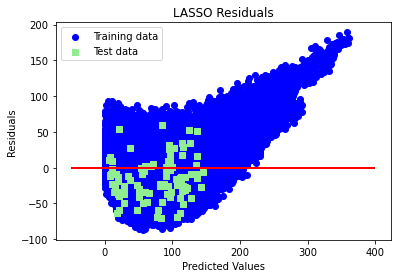

In [8]:
plot_residual('LASSO', y_train_predict2, np.asarray(y_train), y_test_predict2, np.asarray(y_test)[0:len(y_test),0])

## Ridge

In [9]:
rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict3 = rdg.predict(X_test)
y_train_predict3 = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict3)), 
      (metrics.r2_score(y_test, y_test_predict3))))

rdg_metrics = regression_metrics('Ridge Regression', y_test, y_test_predict3)
rdg_metrics

R^2 training: 0.644, R^2 test: 0.394


,Ridge Regression
Root Mean Squared Error,32.360923
Mean Absolute Error,26.997983
R^2,0.540492


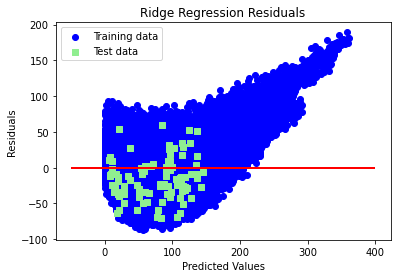

In [10]:
plot_residual('Ridge Regression', y_train_predict3, np.asarray(y_train), y_test_predict3, np.asarray(y_test)[0:len(y_test),0])

## Polynomial Regression

In [11]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict4 = polyreg.predict(X_test_poly)
y_train_predict4 = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict4)), 
      (metrics.r2_score(y_test, y_test_predict4))))


polyreg_metrics = regression_metrics('Polynomial Regression', y_test, y_test_predict4)
polyreg_metrics

R^2 training: 0.700, R^2 test: 0.542


,Polynomial Regression
Root Mean Squared Error,28.110016
Mean Absolute Error,22.920712
R^2,0.602923


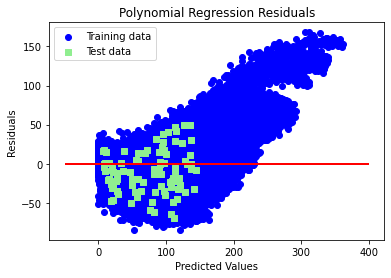

In [12]:
plot_residual('Polynomial Regression', y_train_predict4, np.asarray(y_train), y_test_predict4, np.asarray(y_test)[0:len(y_test),0])

In [13]:
# Tuning Polynomial Regression

param_grid = [{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'poly__degree': 2}


C:\Users\clair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\clair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\clair\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\clair\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\clair\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\clair\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 114, in __get__
    ge

Text(0.5, 1.0, 'RMSE VS Degree')

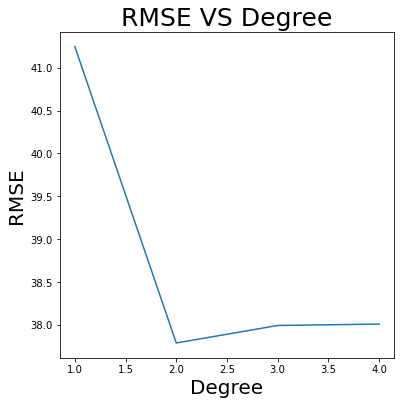

In [14]:
# Let's find out the model we need to select

maxdegree=5 
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train)
    lr=LinearRegression(fit_intercept=False)
    model=linear_model.LinearRegression()
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    
    rmse_train=metrics.mean_squared_error(y_train,y_train_pred)**0.5
    cve=cross_validate(lr,x_poly_train,y_train,cv=5,scoring='neg_root_mean_squared_error',return_train_score=True)
    training_error.append(rmse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('RMSE',fontsize=20)
ax.set_title('RMSE VS Degree',fontsize=25)

#https://medium.com/@aamir199811/polynomial-regression-with-k-fold-cross-validation-bc5275137546

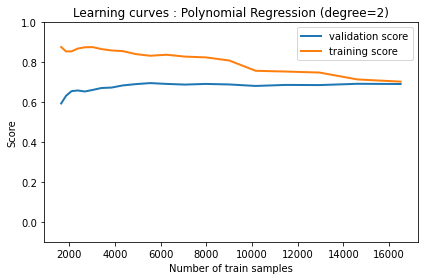

In [15]:
# Cross validation for Polynomial Regression

d=2
model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, validation_scores.mean(axis=1), lw=2, label='validation score')
plt.plot(train_sizes, train_scores.mean(axis=1), lw=2, label='training score')
plt.ylim(ymin=-.1, ymax=1)

plt.legend(loc='best')
plt.xlabel('Number of train samples')
plt.ylabel('Score')
plt.title('Learning curves : Polynomial Regression (degree=%i)' % d)
plt.tight_layout()
plt.show()

## Random Forest Regressor

In [16]:
# With tuning
#rf = RandomForestRegressor(n_estimators=200, max_features=3, max_depth=4, min_samples_split=2, n_jobs=-1, random_state=1)

# Without tuning
rf = RandomForestRegressor(n_estimators=500, max_features=3, max_depth=4, min_samples_split=2, n_jobs=-1, random_state=1)

rf.fit(X_train, y_train)

y_test_predict6 = rf.predict(X_test)
y_train_predict6 = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict6)), 
      (metrics.r2_score(y_test, y_test_predict6))))


for i in range(len(y_test_predict6)):
    y_test_predict6[i]=int(y_test_predict6[i])
    

    
rf_metrics = regression_metrics('Random Forest Regression', y_test, y_test_predict6)
rf_metrics

R^2 training: 0.699, R^2 test: 0.581


,Random Forest Regression
Root Mean Squared Error,26.665521
Mean Absolute Error,21.350000
R^2,0.662056


In [17]:
pd.Series(y_test_predict6)

0     180.0
1     147.0
2      33.0
3      80.0
4      82.0
      ...  
95    130.0
96    103.0
97     61.0
98    128.0
99     44.0
Length: 100, dtype: float64

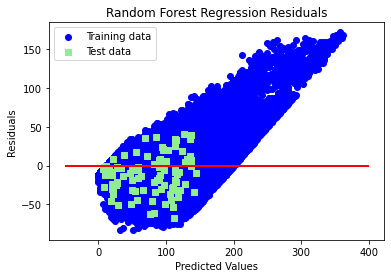

In [18]:
plot_residual('Random Forest Regression', y_train_predict6, np.asarray(y_train), y_test_predict6, np.asarray(y_test)[0:len(y_test),0])

In [19]:
# Grid search for Random Forest

def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()  
    param_grid = { 
            "n_estimators"      : [10,20,60,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2", 1,2,3,4],
            "min_samples_split" : [2,6,10],
            "max_depth":[4],
            "random_state":[1]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [20]:
# Grid_Search_CV_RFR(X_train, y_train) 

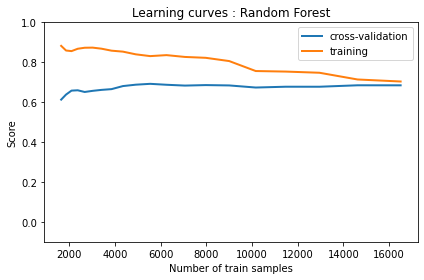

In [21]:
# Cross validation for Random Forest 

model = make_pipeline(RandomForestRegressor(n_estimators=500, max_features=3, max_depth=4, n_jobs=-1, random_state=1))
train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, validation_scores.mean(axis=1), lw=2, label='cross-validation')
plt.plot(train_sizes, train_scores.mean(axis=1), lw=2, label='training')
plt.ylim(ymin=-.1, ymax=1)

plt.legend(loc='best')
plt.xlabel('Number of train samples')
plt.ylabel('Score')
plt.title('Learning curves : Random Forest')
plt.tight_layout()
plt.show()

In [22]:
# Regression metrics comparison 

reg_metrics_bfe = pd.concat([lasso_metrics, rdg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,LASSO Regression,Ridge Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.361810,32.360923,28.110016,26.665521
Mean Absolute Error,26.997974,26.997983,22.920712,21.350000
R^2,0.540460,0.540492,0.602923,0.662056
